In [89]:
import pandas as pd 
import matplotlib.pyplot as plt


In [90]:
df = pd.read_excel('datos_idm.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   empresa               1132 non-null   object        
 1   requisitor            985 non-null    object        
 2   po                    1115 non-null   object        
 3   fecha_de_po           863 non-null    datetime64[ns]
 4   num_cot               996 non-null    object        
 5   cantidad              1125 non-null   float64       
 6   descripción           1133 non-null   object        
 7   factura               384 non-null    object        
 8   fecha_de_facturación  380 non-null    datetime64[ns]
 9   p_unit_dll            722 non-null    float64       
 10  p_unit_pesos          408 non-null    float64       
 11  sub_total_dll         896 non-null    float64       
 12  sub_total_pesos       1460 non-null   float64       
 13  total_iva_dll     

In [91]:
df['year_po'] = df['fecha_de_po'].dt.year
print(df['year_po'])
df['year_factura'] = df['fecha_de_facturación'].dt.year
print()
print(df['year_factura'])

0       2024.0
1       2024.0
2       2023.0
3       2023.0
4       2023.0
         ...  
1695       NaN
1696       NaN
1697       NaN
1698       NaN
1699       NaN
Name: year_po, Length: 1700, dtype: float64

0       2024.0
1       2024.0
2       2024.0
3       2024.0
4       2024.0
         ...  
1695       NaN
1696       NaN
1697       NaN
1698       NaN
1699       NaN
Name: year_factura, Length: 1700, dtype: float64


In [92]:
df_clean_date = df[((df['year_po'] >= 2021) & (df['year_po'] <= 2024)) & ((df['year_factura'] >= 2021) & (df['year_factura'] <= 2024))]

In [93]:
df_clean_date

,empresa,requisitor,po,fecha_de_po,num_cot,cantidad,descripción,factura,fecha_de_facturación,p_unit_dll,p_unit_pesos,sub_total_dll,sub_total_pesos,total_iva_dll,total_iva_pesos,year_po,year_factura
0,Logical USD,Ubaldo Calderón,L112024-1,2024-01-03,3980,1.0,Componentes CAF,80,2024-01-03,7820.0,NaN,7820.0,NaN,8445.6,NaN,2024.0,2024.0
1,Logical USD,Ubaldo Calderón,L010424-2,2024-01-04,3989,3.0,Plunger Dib. L2348-110-T031,78,2024-01-10,55.0,NaN,165.0,NaN,178.2,NaN,2024.0,2024.0
2,Medtronic,Luis Fernando,4200965110,2023-12-13,3975,3.0,0.0195 Necking TS130129,539,2024-01-05,NaN,4580.0,NaN,13740.0,NaN,14839.2,2023.0,2024.0
3,Medtronic,Luis Fernando,4200961946,2023-12-06,3974,3.0,Tip Attach tubing Flaring TS114580,541,2024-04-04,NaN,1950.0,NaN,5850.0,NaN,6318.0,2023.0,2024.0
4,Medtronic,Luis Fernando,4200961946,2023-12-06,3974,1.0,Tip Cut VBLOCK,538,2024-01-04,NaN,4500.0,NaN,4500.0,NaN,4860.0,2023.0,2024.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,Medtronic,Jesus Lomeli,4201175175,2024-11-29,4410,10.0,Inner Shaft flaring pin dib. T462753,667,2024-12-03,NaN,2250.0,NaN,22500.0,NaN,24300.0,2024.0,2024.0
403,Greatbatch,Daniel Hiram Flores,JP310067523,2024-12-06,4403,1.0,Servicio expeditado,F1745,2024-12-06,750.0,NaN,750.0,NaN,810.0,NaN,2024.0,2024.0
405,Medtronic,Britany Magallon,4201178756,2024-12-06,4411,3.0,Guardas de policarbonato,24086,2024-12-13,NaN,4950.0,NaN,14850.0,NaN,16038.0,2024.0,2024.0
412,Greatbatch,Daniel Hiram Flores,JP310069165,2024-12-20,4441,1.0,Servicio expeditado,F1753,2024-12-23,1500.0,NaN,1500.0,NaN,1620.0,NaN,2024.0,2024.0


In [94]:
df_clean_date['tiempo_de_proceso'] = abs(df_clean_date['fecha_de_facturación'] - df_clean_date['fecha_de_po'])

/tmp/ipykernel_18630/3796765260.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_date['tiempo_de_proceso'] = abs(df_clean_date['fecha_de_facturación'] - df_clean_date['fecha_de_po'])


In [95]:
tiempo_de_proceso = df_clean_date[['tiempo_de_proceso', 'descripción', 'empresa']].sort_values(by='tiempo_de_proceso', ascending=False)
print(tiempo_de_proceso.head())

    tiempo_de_proceso                                        descripción  \
74           353 days               Soporte de pared Tabloide ( 2 Sets )   
90           342 days   Retrabajo de Cavidades de fixtura Nest #19TM0...   
77           325 days                       Core Pin Austin # 19TM09N800   
169          123 days  Fixtura de Sujeción de Válvula para limpieza d...   
3            120 days                 Tip Attach tubing Flaring TS114580   

        empresa  
74     Caliente  
90   Greatbatch  
77   Greatbatch  
169   Medtronic  
3     Medtronic  


In [96]:
tiempo_de_proceso.tail(5)

,tiempo_de_proceso,descripción,empresa
167,0 days,Electrodo mod. 3005 M-05-002,Bourns
222,0 days,TS114580,Medtronic
223,0 days,retrabajo de Necking in pact 018 XL,Medtronic
262,0 days,Attach Tubing pin TS114580,Medtronic
0,0 days,Componentes CAF,Logical USD


In [97]:
df_clean_date.info()

<class 'pandas.core.frame.DataFrame'>
Index: 372 entries, 0 to 413
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   empresa               372 non-null    object         
 1   requisitor            372 non-null    object         
 2   po                    372 non-null    object         
 3   fecha_de_po           372 non-null    datetime64[ns] 
 4   num_cot               365 non-null    object         
 5   cantidad              372 non-null    float64        
 6   descripción           372 non-null    object         
 7   factura               372 non-null    object         
 8   fecha_de_facturación  372 non-null    datetime64[ns] 
 9   p_unit_dll            212 non-null    float64        
 10  p_unit_pesos          160 non-null    float64        
 11  sub_total_dll         212 non-null    float64        
 12  sub_total_pesos       160 non-null    float64        
 13  total_iva_

In [98]:
tiempo_de_proceso = tiempo_de_proceso.loc[df_clean_date['tiempo_de_proceso'] != pd.Timedelta(0)]
tiempo_de_proceso.tail()

,tiempo_de_proceso,descripción,empresa
116,1 days,Retrabajos cot 4085,Logical USD
15,1 days,Guardas laterales en policarb.,Medtronic
202,1 days,Boccole Per Trafilatura #0210110,Medtronic
358,1 days,S10 Necking de dib.,Medtronic
85,1 days,Element Base Nest Mod 8000 M-08-001,Bourns


In [99]:
tiempo_de_proceso['tiempo_de_proceso'].mean()

Timedelta('27 days 05:45:45.762711864')

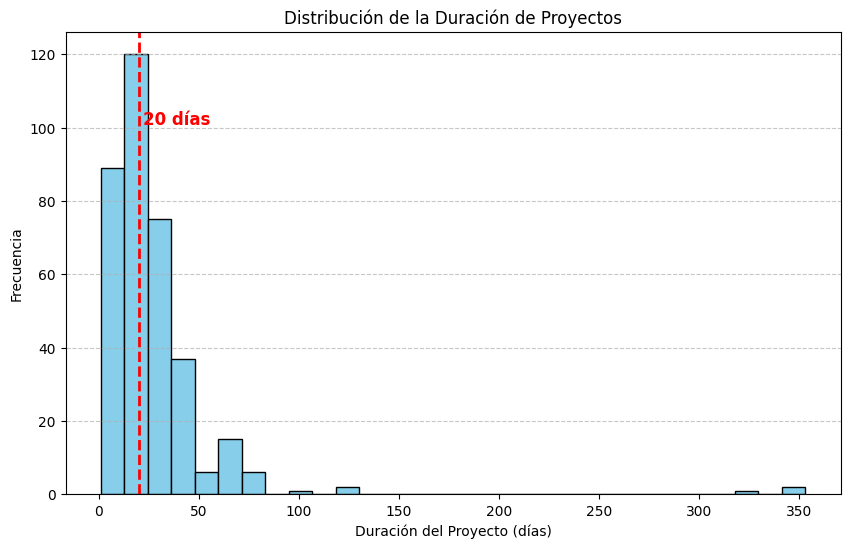

In [111]:
mediana = df_clean_date['tiempo_de_proceso'].dt.days.median()

plt.figure(figsize=(10, 6))
plt.hist(tiempo_de_proceso['tiempo_de_proceso'].dt.days, bins=30, color='skyblue', edgecolor='black')
plt.axvline(df_clean_date['tiempo_de_proceso'].dt.days.median(), color='red', linestyle='dashed', linewidth=2, label="Mediana")
plt.text(mediana + 2, plt.gca().get_ylim()[1] * 0.8, f"{int(mediana)} días", color='red', fontsize=12, fontweight='bold')
plt.xlabel("Duración del Proyecto (días)")
plt.ylabel("Frecuencia")
plt.title("Distribución de la Duración de Proyectos")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("distribucion_duracion_de_proyectos(2021-2024).png", dpi=300, bbox_inches="tight")
plt.show()

In [104]:
tiempo_de_proceso.describe()

,tiempo_de_proceso
count,354
mean,27 days 05:45:45.762711864
std,34 days 06:04:58.440738346
min,1 days 00:00:00
25%,12 days 06:00:00
50%,21 days 00:00:00
75%,33 days 00:00:00
max,353 days 00:00:00
